## Practise notebook: Qiskit Developer Certification Exam


In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

### Creating Bell states

In [2]:
from qiskit.quantum_info import Statevector

#Defining Quantum circuit
bell0 = QuantumCircuit(2)

#Creating Bell state
bell0.h(0)
bell0.cx(0,1)

#Extracting statevector
sv = Statevector.from_label('00')
sv_ev = sv.evolve(bell0)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

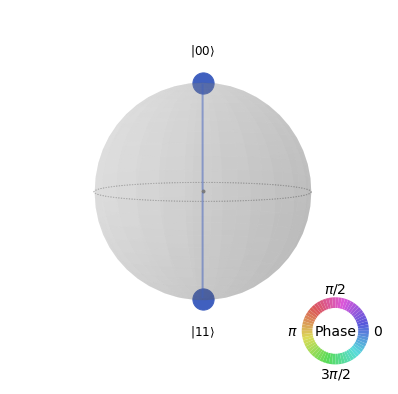

In [39]:
sv_ev.draw('qsphere') 

In [3]:
#Defining Quantum circuit
bell1 = QuantumCircuit(2)

#Creating Bell state
bell1.h(0)
bell1.cx(0,1)

#Extracting statevector
sv1 = Statevector.from_label('01')
sv_ev1 = sv1.evolve(bell1)
sv_ev1.draw('latex')

<IPython.core.display.Latex object>

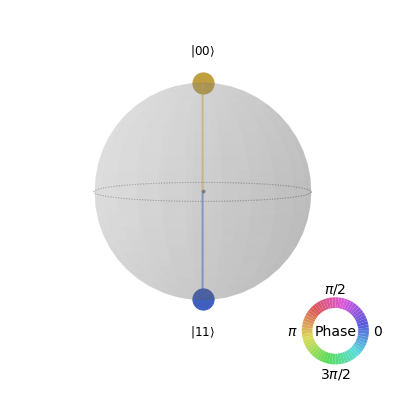

In [41]:
sv_ev1.draw('qsphere')

In [4]:
#Defining Quantum circuit
bell2 = QuantumCircuit(2)

#Creating Bell state
bell2.x(1)
bell2.h(0)
bell2.cx(0,1)

#Extracting statevector

sv_ev2 = sv.evolve(bell2)
sv_ev2.draw('latex')

<IPython.core.display.Latex object>

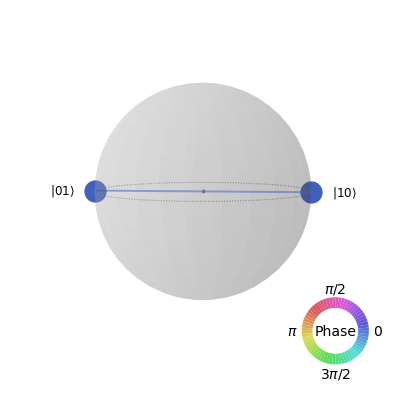

In [43]:
sv_ev2.draw('qsphere')

In [5]:
#Defining Quantum circuit
bell3 = QuantumCircuit(2)

#Creating Bell state
bell3.x(0)
bell3.x(1)
bell3.h(0)
bell3.cx(0,1)

#Extracting statevector
sv_ev3 = sv.evolve(bell3)
sv_ev3.draw('latex')

<IPython.core.display.Latex object>

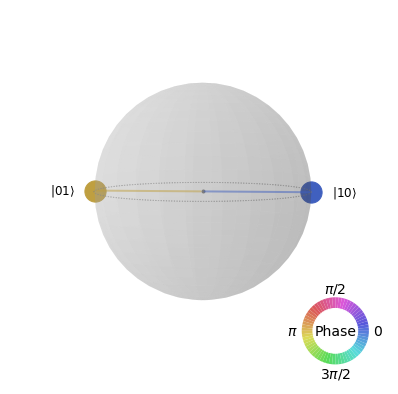

In [45]:
sv_ev3.draw('qsphere')

In [6]:
bell3.draw('text')

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘

## Creating GHZ State

In [7]:
qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx([0,0],[1,2])
qc_ghz.draw('text')

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

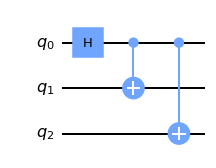

In [6]:
qc_ghz.draw()

In [8]:
sv = Statevector.from_label('000')
sv_ev = sv.evolve(qc_ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [9]:
sv = Statevector.from_int(0,2**3)
sv_ev = sv.evolve(qc_ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [10]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

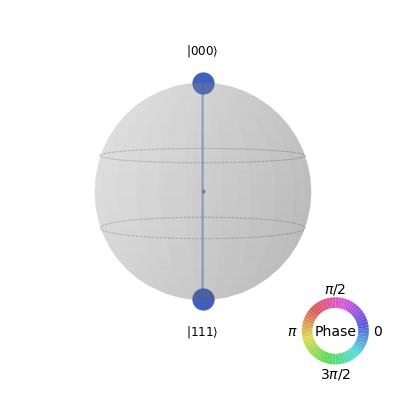

In [11]:
ghz_backend = Aer.get_backend('statevector_simulator')
job = execute(qc_ghz, ghz_backend, shots = 1000)  
result = job.result()
sv_ghz2 = result.get_statevector(qc_ghz) 

plot_state_qsphere(sv_ghz2)

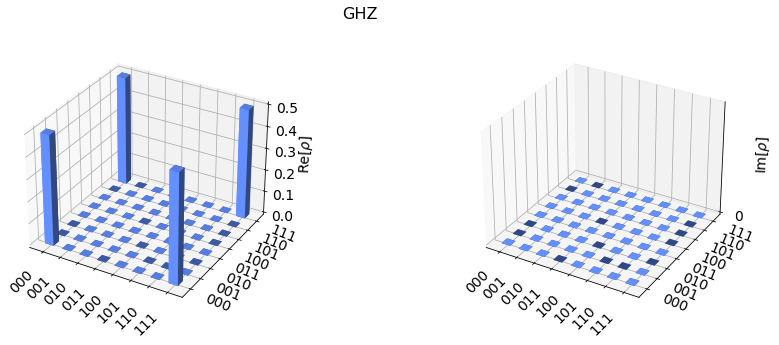

In [42]:

plot_state_city(sv_ghz2, title = 'GHZ')

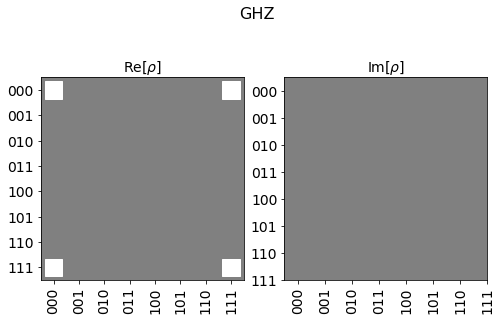

In [44]:
plot_state_hinton(sv_ghz2, title = 'GHZ')

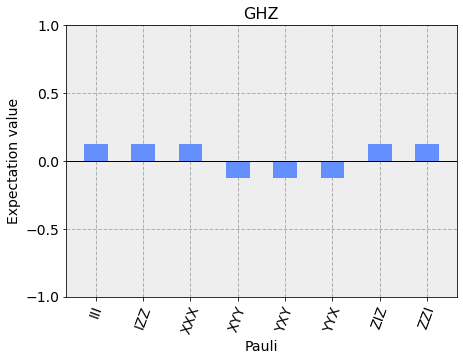

In [46]:
plot_state_paulivec(sv_ghz2, title = 'GHZ')

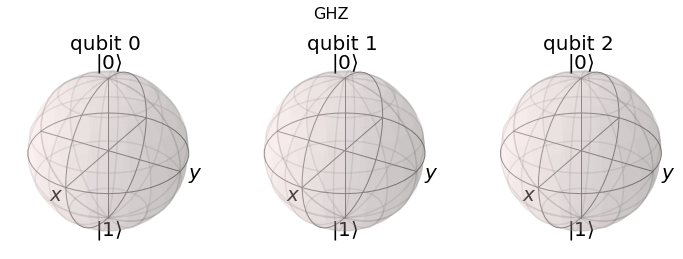

In [47]:
plot_bloch_multivector(sv_ghz2, title = 'GHZ')

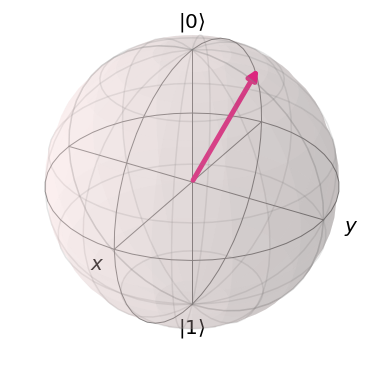

In [21]:
plot_bloch_vector([0,0.5,1])

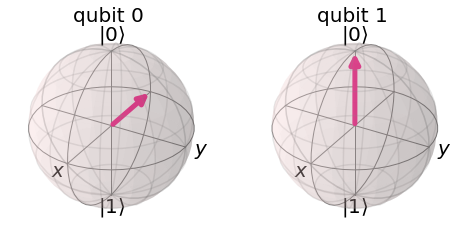

In [12]:
q_a = QuantumRegister(1, 'q_a')
q_b = QuantumRegister(1, 'q_b')

qc = QuantumCircuit(q_a,q_b)

qc.h(0)
qc.z(0)

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend, shots = 1000)
res = job.result()
sv = res.get_statevector()

#sv.draw('latex')
plot_bloch_multivector(sv)

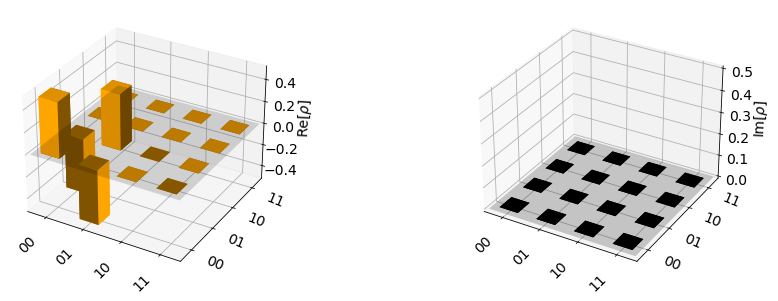

In [13]:
plot_state_city(sv, color = ['orange', 'black'])

In [14]:
qc.measure_all()

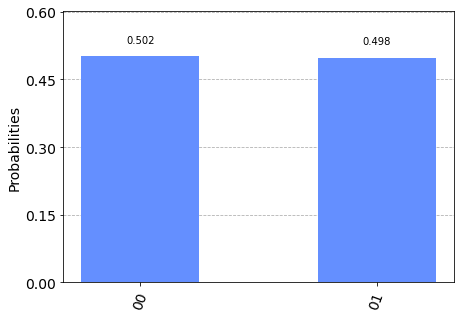

In [49]:
backend = Aer.get_backend('qasm_simulator')
res = execute(qc, backend, shots = 1000).result()
counts = res.get_counts()

plot_histogram(counts)

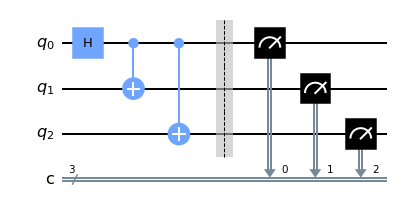

In [15]:
meas = QuantumCircuit(3,3)
meas.barrier()
meas.measure([0,1,2],[0,1,2])

circ = meas.compose(qc_ghz, range(3), front = True )
circ.draw()

In [62]:
backend = Aer.get_backend('qasm_simulator')
res = backend.run(circ, shots = 1000).result()

counts = res.get_counts()
print(counts)

{'111': 499, '000': 501}


In [85]:
res2 = execute(circ, backend, shots = 1000).result()
counts2 = res2.get_counts()

print(counts2)

{'000': 496, '111': 504}


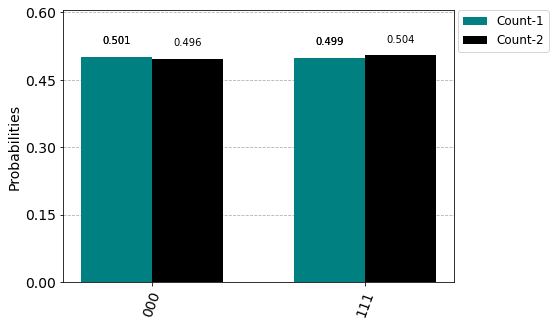

In [90]:
legend = ['Count-1', 'Count-2']
colour = ['teal', 'black']

plot_histogram([counts,counts2], legend=legend, sort='asc', color=colour) #, bar_labels = False)

In [95]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [16]:
from qiskit.tools import job_monitor

import qiskit.tools.jupyter
#%qiskit_job_watcher

In [ ]:
quito = provider.get_backend('ibmq_quito')
job = execute(circ, quito, shots = 1000)
job_monitor(job)

Job Status: job is queued (8)     

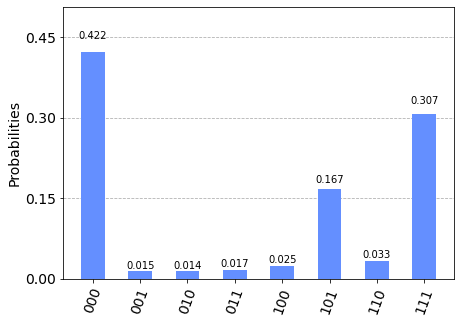

In [98]:
counts3 = job.result().get_counts()
plot_histogram(counts3)

In [17]:
from qiskit.quantum_info import Operator

U = Operator(qc_ghz)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [100]:
np.around(U.data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [102]:
uni_backend = Aer.get_backend('unitary_simulator')

U = execute(qc_ghz, uni_backend).result().get_unitary(decimals=3)
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

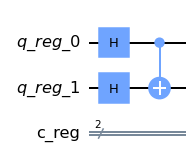

In [18]:
q = QuantumRegister(2, 'q_reg')
c = ClassicalRegister(2, 'c_reg')

qc = QuantumCircuit(q,c)

qc.h([0,1])
qc.cx(q[0],q[1])

qc.draw('mpl')

In [19]:
U_bell = Operator(qc)
np.around(U_bell, 3)

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j]])

In [108]:
uni_backend = Aer.get_backend('unitary_simulator')
U = execute(qc, uni_backend).result().get_unitary(decimals=3)
U

array([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j],
       [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j]])

### State sucks here :(

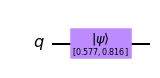

In [43]:
a = 1/np.sqrt(3)
desired_state = [a, np.sqrt(1-a**2)]

q = QuantumRegister(1, 'q')
qc = QuantumCircuit(q)
qc.initialize(desired_state,0)
qc.draw('mpl')

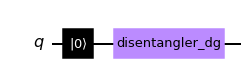

In [44]:
qc.decompose().draw()

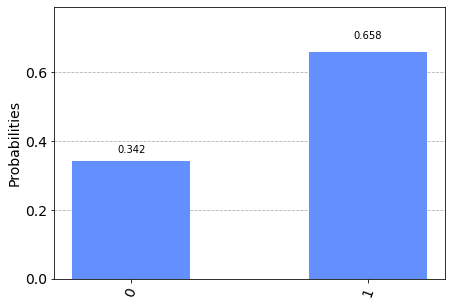

In [45]:
qc.measure_all()
qc.draw()

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1000).result().get_counts()
plot_histogram(counts)

In [57]:


back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector()
qc_sv


array([0.+0.j, 1.+0.j])

In [47]:
from qiskit.quantum_info import state_fidelity
state_fidelity(desired_state, qc_sv)

0.6666666666666663

until now.

In [58]:
# Gate and prrocess fidility

from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

#these differ only by a phase so the gate and process
#fidelities are expected to be 1

a = average_gate_fidelity(op_a,op_b)
a

1.0

In [52]:
b = process_fidelity(op_a, op_b)
a == b

True

In [59]:
back = Aer.get_backend('unitary_simulator')
result = execute(qc, back).result()
U_qc = result.get_unitary(decimals = 3)
U_qc

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-246 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


Traceback (most recent call last):
  File "/tmp/ipykernel_60/2360734649.py", line 3, in <module>
    U_qc = result.get_unitary(decimals = 3)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 347, in get_unitary
    return postprocess.format_unitary(self.data(experiment)["unitary"], decimals=decimals)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 198, in data
    return self._get_experiment(experiment).data.to_dict()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 408, in _get_experiment
    raise QiskitError(result_status, ", ", exp_status)
QiskitError: 'ERROR:  [Experiment 0] Circuit circuit-246 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method. ,  ERROR: Circuit circuit-246 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.'

Use %tb to get the full traceback.


Creating gate from circuit:

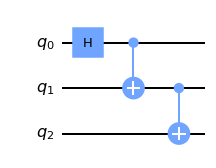

In [60]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw()

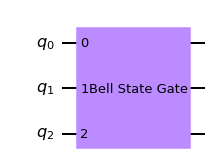

In [63]:
qc_gate = qc.to_gate()
qc_gate.name = 'Bell State Gate'

circ = QuantumCircuit(3)
circ.append(qc_gate, [0,1,2])
circ.draw()

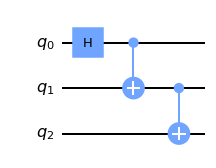

In [66]:
circ.decompose().draw()

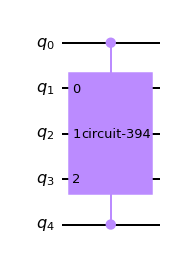

In [72]:
c_qc_gate = qc.to_gate().control(2)
c_qc_gate.name = 'C-Bell State Gate'

circ2 = QuantumCircuit(5)
circ2.append(c_qc_gate, [0,4,1,2,3])
circ2.draw()

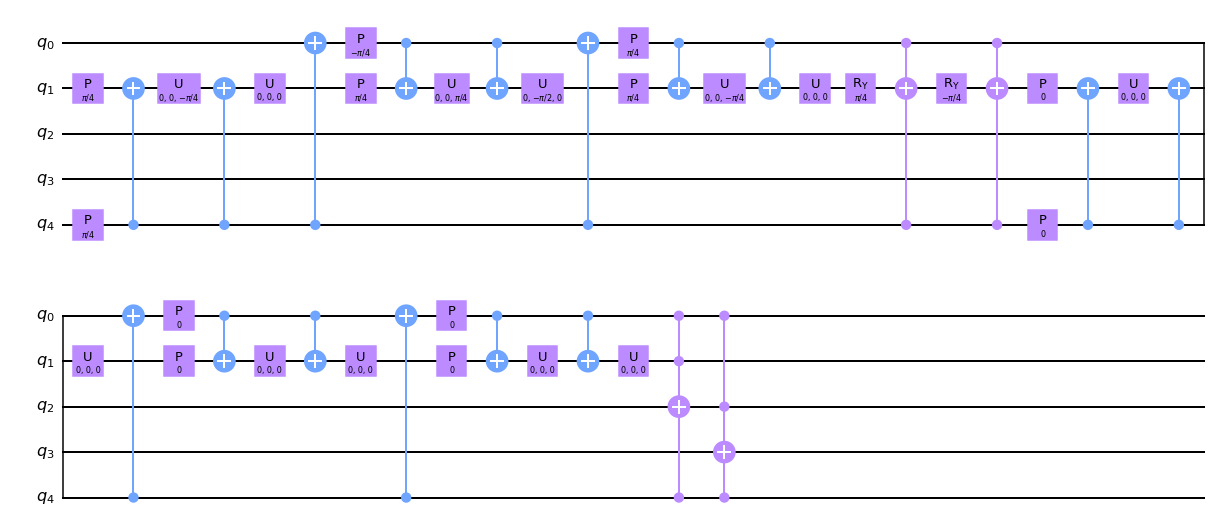

In [77]:
circ2.decompose().draw()

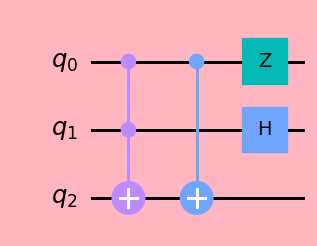

In [121]:
#going back to our simpler circuit!
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)
qc.draw(scale = 1.5, style = {'backgroundcolor': 'lightpink'})

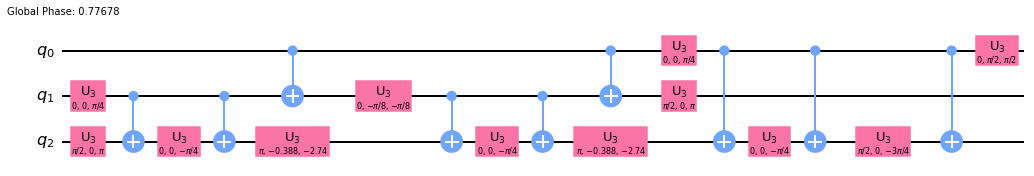

In [85]:
trans = transpile(qc, basis_gates = ['u3','cx','s'])
trans.draw('mpl')

In [108]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc, output='text')

┌───┐
q_0: ──■────■──┤ Z ├
       │    │  ├───┤
q_1: ──■────┼──┤ H ├
     ┌─┴─┐┌─┴─┐└───┘
q_2: ┤ X ├┤ X ├─────
     └───┘└───┘

In [116]:

qc.measure_all()


In [123]:
qasm_str = qc.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\nccx q[0],q[1],q[2];\ncx q[0],q[2];\nh q[1];\nz q[0];\n'

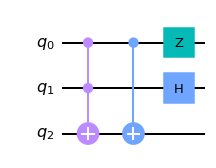

In [124]:
circ = QuantumCircuit.from_qasm_str(qasm_str) #you got to be kidding!
circ.draw()

In [126]:
qc.depth()

3

In [129]:
qiskit.__version__

'0.19.1'

In [130]:
#this is your tool to get all the information on all the hardware available, check it for yourself!
import qiskit.tools.jupyter
%qiskit_backend_overview

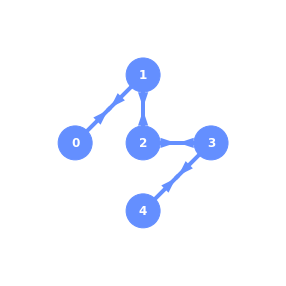

In [137]:
#that's not a problem!

from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend, plot_directed=True) #check other things you can do in this within docs!

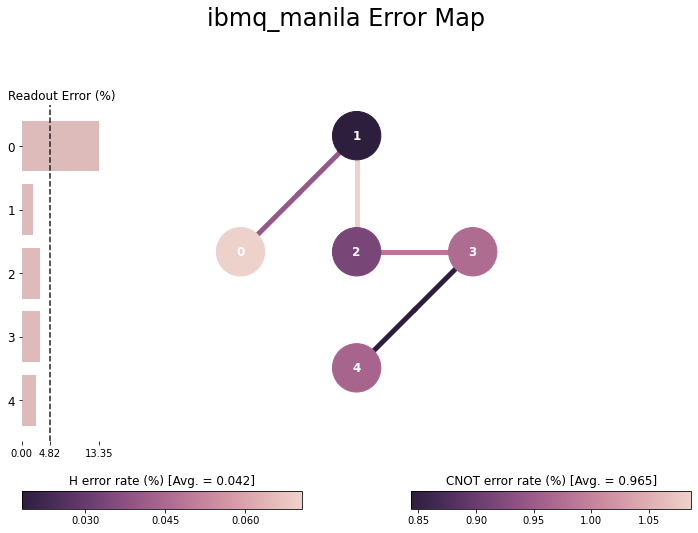

In [135]:
plot_error_map(backend)

In [140]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.measure_all()
sim = BasicAer.get_backend('qasm_simulator')

couple_map = [[0,2],[1,2]] #specify some linear connection
job = execute(qc, sim, shots=1000, coupling_map=couple_map) #here is how you take that in execute also!

result = job.result()
counts = result.get_counts()
print(counts)

{'100': 132, '110': 128, '011': 118, '010': 113, '000': 126, '101': 131, '001': 138, '111': 114}
